a) The application of the spectral clustering technique is very useful for data that do not have an easy identification or are easily classifiable. It is also a method that is widely used in data sets where other clustering methods do not work well. Examples of data types where spectral clustering is used are in biological data, grouping genes according to common characteristics that the algorithm identifies. It is also used in social network analysis, identifying patterns of behavior or interactions that could characterize a specific group of people and their preferences, among others.

b)The mathematical foundations of spectral clustering are based on graph theory, spectral analysis, and linear algebra. Therefore, the points in the space representing the data are identified as nodes, and based on them, distances to the others are calculated, which can be Euclidean distance or another method, in order to determine how close or far they are from each other. Next, based on the distances, clusters can be created that group the closest points and can classify the information. In some cases, normalizing the data can improve the quality of the clusters.

c)

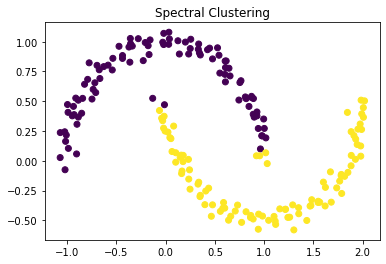

In [1]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generar un conjunto de datos de ejemplo
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Construir una matriz de afinidad usando la distancia Euclidiana
W = np.exp(-10 * np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1))

# Construir la matriz Laplaciana sinormalizada
D = np.diag(np.sum(W, axis=1))
L = D - W

# Calcular los dos primeros vectores propios
k = 2
eigenvalues, eigenvectors = np.linalg.eig(L)
idx = np.argsort(eigenvalues)[:k]
V = eigenvectors[:, idx]

# Normalizar cada fila de la matriz V
V_normalized = V / np.linalg.norm(V, axis=1)[:, np.newaxis]

# Aplicar k-means a las filas de la matriz V normalizada
model = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', assign_labels='kmeans')
y_pred = model.fit_predict(V_normalized)

# Visualizar los resultados del clustering
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Spectral Clustering')
plt.show()

In this example, an example dataset is generated using the make_moons function from Scikit-Learn. Then, an affinity matrix is built using the Euclidean distance and the unnormalized Laplacian matrix is constructed. Next, the first two eigenvectors of the Laplacian matrix are calculated and normalized. Finally, the spectral clustering algorithm is applied using k-means to the rows of the normalized matrix V, and the clustering results are visualized.

d) The concept of spectral clustering is highly related to the topics covered so far in the course, in the sense that its resolution requires the application of methods for constructing matrices using distance methods such as Euclidean distance, applying numpy methods for normalization, extracting information about the matrix such as eigenvalues and eigenvectors, performing a clustering method, in the previous case it was k-means, and finally plotting. All of these concepts have been reviewed individually, but it is evident that when performed together in the indicated order, spectral clustering can be performed.